In [1]:
import nltk

# Categories, Files and Words
Load the corpus and list any categories defined in it:

In [2]:
from nltk.corpus import reuters
categories = reuters.categories()
print("Number of Categories:",len(categories))
print(categories[0:9],categories[-10:])

Number of Categories: 90
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil'] ['sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


Individual words can be extracted with the words() method:


In [3]:
words = reuters.words()
print("Number of words",len(words))
print("First 10 words:",words[0:9])

Number of words 1720901
First 10 words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-']


# Filter Text by Category
Get all news article words classified under "trade":

In [9]:
#Extract at a sepecific category
trade_words = reuters.words(categories = 'trade')
len(trade_words)

142723

# Remove Stopwords and Punctuation

The idea of Natural Language Processing is to do some form of analysis, or processing, where the machine can understand, at least to some level, what the text means, says, or implies.


 The process of converting data to something a computer can understand is referred to as "pre-processing." One of the major forms of pre-processing is going to be filtering out useless data. In natural language processing, useless words (data), are referred to as stop words.

In [10]:
from nltk.corpus import stopwords
import string
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [11]:
trade_words = [w for w in trade_words if w.lower() not in stopwords.words('english')]

In [12]:
len(trade_words)

95478

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
trade_words = [w for w in trade_words if w not in string.punctuation]
len(trade_words)

78885

In [15]:
punctCombo = [c+"\"" for c in string.punctuation ]+ ["\""+c for c in string.punctuation ]
trade_words = [w for w in trade_words if w not in punctCombo]
len(trade_words)

78019

In [16]:
print("First 10 words:",words[0:9])

First 10 words: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-']


# Word Frequency Distribution

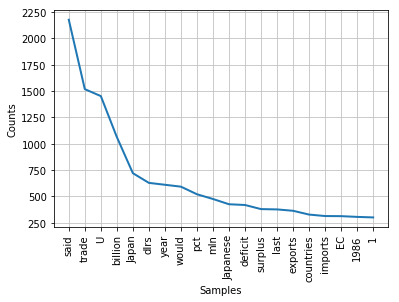

In [17]:
fdist = nltk.FreqDist(trade_words)
fdist.plot(20, cumulative=False)


In [18]:
for word, frequency in fdist.most_common(10):
    print(word, frequency)

said 2177
trade 1518
U 1452
billion 1063
Japan 720
dlrs 628
year 610
would 592
pct 520
mln 475


# Bi-Grams
http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html


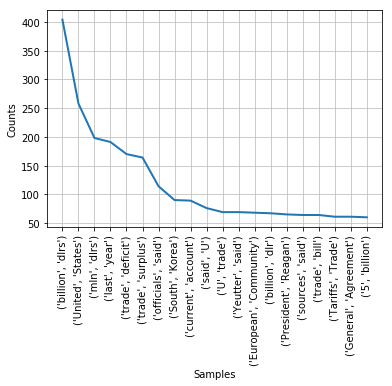

In [20]:
biTradeWords = nltk.bigrams(trade_words)
biFdist = nltk.FreqDist(biTradeWords)
biFdist.plot(20, cumulative=False)

# Exploring the Penn Treebank

The NLTK data package includes a 10% sample of the Penn Treebank. This can be used for exploring the concepts of Part-of-Speech tagging and the concept of sentence word classifications with grouping and heirarchies.

In [21]:
from nltk.corpus import treebank

In [22]:
words = treebank.words()
tagged = treebank.tagged_words()
print(type(tagged))
print("Word Count", len(words))
print("Tagged words sample: ",tagged[0:9])

<class 'nltk.corpus.reader.util.ConcatenatedCorpusView'>
Word Count 100676
Tagged words sample:  [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB')]


This treebank allows us to extract specific parsed sentences:


In [23]:
parsed = treebank.parsed_sents()[0]
print(parsed)
print(type(parsed))

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
<class 'nltk.tree.Tree'>


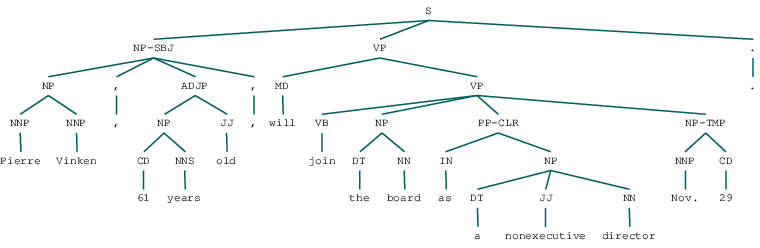

In [26]:
import IPython
IPython.core.display.display(parsed)

# Further Investigation
* Import the Brown Corpus
* List the categories and count the number of words by category
* Extract the first sentence from the corpus
* Compare the average sentence length between Religion, News and Humor categories
* Identify the top-20 words and bigrams in sentences categoried as "religion" and "news"